In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..','..','..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


from src.multilinear_ops.tensorize import tensorize
from src.multilinear_ops.t2m import t2m
from src.multilinear_ops.m2t import m2t
from src.synthetic_data.generate_anomaly import generate_sparse_anomaly
from src.synthetic_data.generate_lr_data import generate_low_rank_data

from src.models.ostd.ostd import ostd_init, ostd_sample
from src.synthetic_data.generate_lr_data import generate_low_rank_data

In [4]:
seed = 1
T = 1000
n1 = 25; n2 = 25
dims = (n1,n2,T)
ranks = (5,5,1000)
M = 100
rho_s = 0.1
modes = [1,2]
rng = np.random.default_rng(seed=seed)
X_gt, C, U = generate_low_rank_data(dims, ranks, seed=seed, return_factors=True)
E_gt, anomaly_mask = generate_sparse_anomaly(X_gt, 'uniform', M, rho_s, seed=seed+1)
N = 0.00001*rng.standard_normal(size=(n1,n2,T))

Y = X_gt + E_gt + N

lda1 = 0.01#1/np.sqrt(np.max(dims))
lda2 = 1/np.sqrt(np.max(dims))# lda1*10

Lt_s, At_s, Bt_s = ostd_init(Y, ranks[:2], modes, seed=seed+3)
rec_err = np.zeros((T))
expressed_variances = np.zeros((len(modes),T))

X_hat = np.zeros(dims)
E_hat = np.zeros(dims)
for t in range(T):
    Y_t = Y[:,:,t]
    X_hat[:,:,t], E_hat[:,:,t], Lt_s, At_s, Bt_s = \
                ostd_sample(Y_t, Lt_s, At_s, Bt_s, lda1, lda2, ranks[:2], modes)
    
    rec_err[t] = np.linalg.norm(X_gt[:,:,t] - X_hat[:,:,t], ord='fro')/np.linalg.norm(X_gt[:,:,t], ord='fro')
    expressed_variances[0,t] = np.linalg.norm(U[0].T@Lt_s[0])/np.linalg.norm(Lt_s[0])
    expressed_variances[1,t] = np.linalg.norm(U[1].T@Lt_s[1])/np.linalg.norm(Lt_s[1])
    print(f't = {t}, rec_err = {rec_err[t]}, expressed_variances = {expressed_variances[:,t]}')



t = 0, rec_err = 0.8143208266446634, expressed_variances = [0.56918173 0.75801834]
t = 1, rec_err = 0.631939020840982, expressed_variances = [0.66912736 0.79903437]
t = 2, rec_err = 0.5202893212349821, expressed_variances = [0.6824826  0.82545054]
t = 3, rec_err = 0.4123269801894081, expressed_variances = [0.69690478 0.85431121]
t = 4, rec_err = 0.35162956616131075, expressed_variances = [0.71394544 0.86308191]
t = 5, rec_err = 0.38766839272825393, expressed_variances = [0.72935914 0.87756435]
t = 6, rec_err = 0.3347334211919305, expressed_variances = [0.73637127 0.89158199]
t = 7, rec_err = 0.35130626674515514, expressed_variances = [0.74841895 0.89431991]
t = 8, rec_err = 0.37764674335417586, expressed_variances = [0.7554967  0.89963066]
t = 9, rec_err = 0.30286760626713854, expressed_variances = [0.76023871 0.90539839]
t = 10, rec_err = 0.3282082486706521, expressed_variances = [0.7686766  0.90973573]
t = 11, rec_err = 0.27790093553787454, expressed_variances = [0.77239225 0.9113101

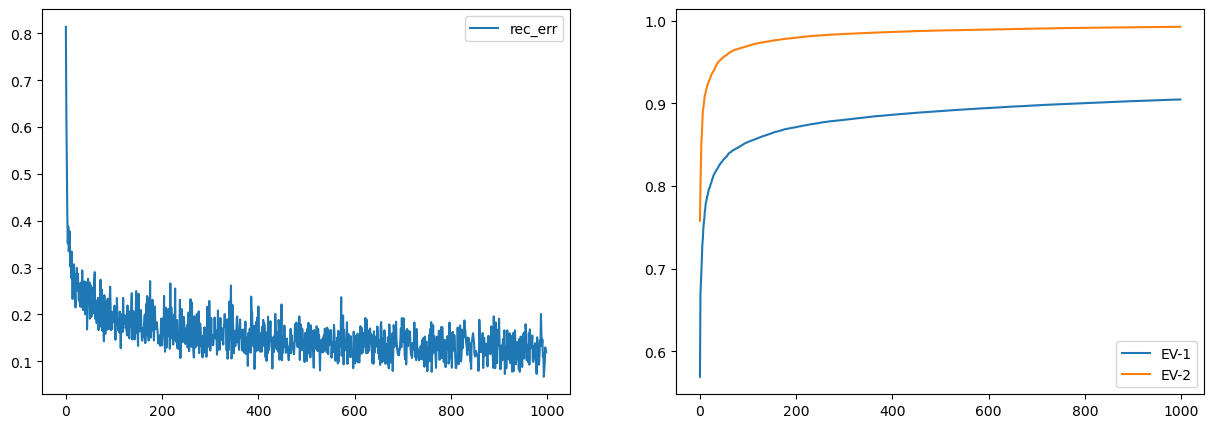

In [5]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(rec_err[:t], label='rec_err')
axes[1].plot(expressed_variances[0,:t], label='EV-1')
axes[1].plot(expressed_variances[1,:t], label='EV-2')
axes[0].legend()
axes[1].legend()
